In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('student-mat.csv')

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Для этого упражнения разделите фрейм данных от «school» до столбца
«guardian».


In [7]:
df2 = df[df.columns[0:12]]

Создайте лямбда-функцию, которая будет капитализировать строчные буквы.

In [8]:
f = lambda x: x.upper()

Используйте функцию для капитализации значений в Mjob и Fjob

In [9]:
df2['Mjob'] = df2['Mjob'].apply(f)
df2['Fjob'] = df2['Fjob'].apply(f)

df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,AT_HOME,TEACHER,course,mother
1,GP,F,17,U,GT3,T,1,1,AT_HOME,OTHER,course,father
2,GP,F,15,U,LE3,T,1,1,AT_HOME,OTHER,other,mother
3,GP,F,15,U,GT3,T,4,2,HEALTH,SERVICES,home,mother
4,GP,F,16,U,GT3,T,3,3,OTHER,OTHER,home,father


Распечатайте последние элементы набора данных (tail).

In [10]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


Вы заметили, что оригинальный набор данных все еще строчный? Почему?
Исправьте это (замените значения Mjob и Fjob на прописные буквы).

Оригинальный набор данных строчный, т.к. слайс из датафрейма - это его копия, которая уже не ссылается на начальный объект

In [11]:
df['Mjob'] = df['Mjob'].apply(f)
df['Fjob'] = df['Fjob'].apply(f)

df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,SERVICES,SERVICES,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,SERVICES,SERVICES,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,OTHER,OTHER,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,SERVICES,OTHER,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,OTHER,AT_HOME,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


Выясните, в каком процентном отношении находятся студенты (по возрасту).

In [12]:
df['age'].value_counts() / len(df)

16    0.263291
17    0.248101
18    0.207595
15    0.207595
19    0.060759
20    0.007595
22    0.002532
21    0.002532
Name: age, dtype: float64

In [13]:
df.groupby('age')['age'].count() / len(df)

age
15    0.207595
16    0.263291
17    0.248101
18    0.207595
19    0.060759
20    0.007595
21    0.002532
22    0.002532
Name: age, dtype: float64

Каков средний уровень потребления алкоголя в каждой из возрастных групп
(15, 16, 17 лет и т.д.) отдельно по выходным и будним дням (поля Walc и Dalc)

In [14]:
df.groupby('age')[['Walc', 'Dalc']].mean()

,Walc,Dalc
age,,
15,1.902439,1.353659
16,2.278846,1.432692
17,2.571429,1.520408
18,2.414634,1.548780
19,1.958333,1.458333
20,2.333333,2.000000
21,3.000000,3.000000
22,5.000000,5.000000


Используя набор данных, попробуйте ответить на вопрос «Есть ли связь
между потреблением алкоголя и академической успеваемостью студентов?»
Аргументируйте ваш ответ.

In [15]:
import seaborn as sns

Вспомогательные фичи: Alc - среднее потребление алкоголя за выходные и будние дни суммарно. G - суммарные баллы по учебе. Данные центрированы. 

In [16]:
Alc = df['Walc'] + df['Dalc']
Alc = Alc - Alc.mean()

G = df['G1'] + df['G2'] + df['G3']
G = G - G.mean()

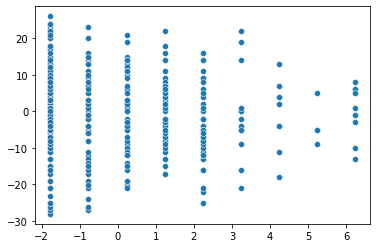

In [17]:
sns.scatterplot(x=Alc, y=G)

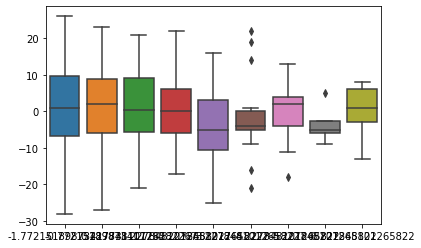

In [18]:
sns.boxplot(x=Alc, y=G)

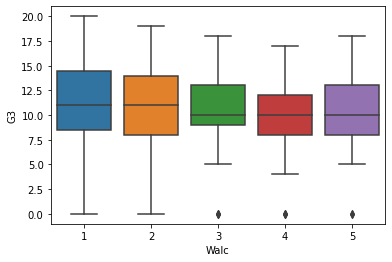

In [25]:
sns.boxplot(x=df['Walc'], y=df['G3'])

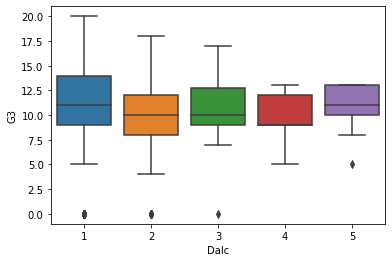

In [26]:
sns.boxplot(x=df['Dalc'], y=df['G3'])

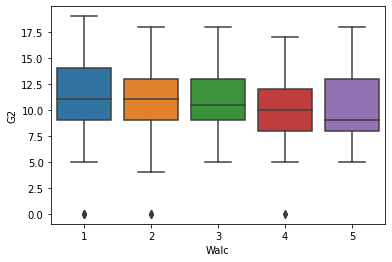

In [27]:
sns.boxplot(x=df['Walc'], y=df['G2'])

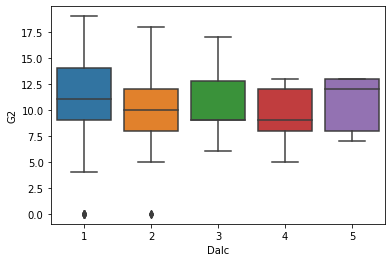

In [28]:
sns.boxplot(x=df['Dalc'], y=df['G2'])

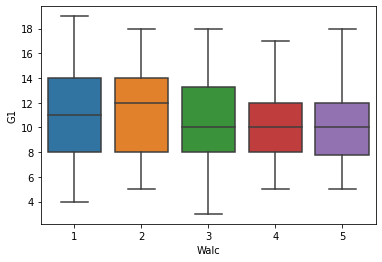

In [29]:
sns.boxplot(x=df['Walc'], y=df['G1'])

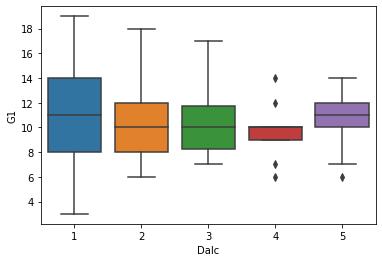

In [30]:
sns.boxplot(x=df['Dalc'], y=df['G1'])

На boxplot'ах видно, что медиана успеваемости практически на одном уровне для всех групп потребления алкоголя => зависимости между потреблением алкоголя и успеваемостью нет.